# Тема проекта "Анализ данных о жалобах клиентов NHTSA"

# Описание проекта


NHTSA (Национальная администрация безопасности дорожного движения) - это правительственное агентство США, собирающее жалобы клиентов о проблемах с автомобилями. Анализ этих жалоб помогает обеспечить безопасность на дорогах, выявить распространенные проблемы и улучшить качество автомобилей.

Проект "Анализ данных о жалобах клиентов NHTSA" направлен на исследование и интерпретацию данных, собранных Национальным управлением безопасностью дорожного движения (NHTSA). Данный анализ позволит лучше понять проблемы, с которыми сталкиваются автовладельцы, а также выявить основные тенденции и паттерны, возникающие в их жалобах.

Датасет NHTSA Customer Complaints состоит из информации о жалобах клиентов на различные автомобили, включая данные о марке, модели, годе выпуска, типе проблемы и статусе жалобы. В рамках проекта будет использован набор данных, доступный на Kaggle, который содержит более 500,000 записей, включая структурированные и неструктурированные данные.

Проект "Анализ данных о жалобах клиентов NHTSA" позволяет не только выявить актуальные проблемы безопасности автомобилей, но и предоставляет ценную информацию для производителей, улучшая их понимание недовольств потребителей и повышая общую безопасность на дороге. В результате анализа может быть разработан более целенаправленный подход к улучшению качества автомобилей и удовлетворенности потребителей.

# Цели и задачи проекта

Целью этого анализа является выявление наиболее распространенных проблем с автомобилями, определение марки/модели автомобиля, наиболее подверженной дефектам, а также выявление потенциальных тенденций в жалобах клиентов NHTSA.
1. **Идентификация основных проблем**: Определить наиболее часто упоминаемые проблемы и дефекты автомобилей, о которых жалуются клиенты.
2. **Анализ тенденций**: Исследовать, как изменялись жалобы по годам и моделям автомобилей, что позволит выявить потенциальные кризисные зоны и ранние признаки угроз безопасности.
3. **Классификация данных**: Создать модели машинного обучения для классификации жалоб по уровням критичности и типам дефектов.
4. **Визуализация данных**: Разработать интерактивные визуализации для представления результатов анализа, что поможет лучше донести сведения до заинтересованных сторон.

# Предобработка данных

## Подключение библиотек

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns
import numpy as np
import sklearn
import tqdm
import time

from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import(
    mean_squared_error,
    r2_score
)

## 1. Загрузка файла с данными.

In [2]:
data = pd.read_csv('complaints.csv')

### Настройка

Настраиваем отображение графиков:

In [3]:
%matplotlib inline
sns.set(style="whitegrid")

Сброс ограничений на количество выводимых стобцов

In [4]:
pd.set_option('display.max_columns', None)

Установка единообразного отображения вешественных чисел с двумя знаками после запятой

In [5]:
pd.set_option('display.float_format', '{:,.2f}'.format)

Проверка и приведение названий столбцов к змеиному регистру

In [6]:
data.columns = data.columns.str.lower().str.replace(' ', '_')

### **Выводы**

#### Проверочные выборки

Выбор первых 10 значений

In [7]:
data.head(10)

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear
0,10702705,"Kia America, Inc.",True,False,0,0,03/24/2015,03/30/2015,5XYPG4A36GG,"SEAT BELTS,SEATS",SEAT BELT DID NOT UNLATCH AFTER CRASH. *TR,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016
1,10713088,"Kia America, Inc.",False,False,0,0,04/24/2015,04/27/2015,5XYPH4A15GG,STRUCTURE,"TRAVELING AT HIGHWAY SPEED, THE WINDSHIELD SEE...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016
2,10713503,"ALUMA TOWER COMPANY, INC",False,True,0,0,04/28/2015,04/29/2015,1YGAE1629GB,ELECTRICAL SYSTEM,TL* THE CONTACT OWNS A 2016 ALUMA AE716TA TRAI...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",ALUMA,AE716TA,2016
3,10715078,"Kia America, Inc.",False,False,0,0,04/30/2015,05/07/2015,NaN,STEERING,"WHILE TRAVELING AT HIGHWAY SPEEDS, THE SORENTO...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016
4,10715844,Volvo Trucks North America,False,False,0,0,03/06/2015,05/12/2015,4V4NC9EH7GN,SUSPENSION,SINCE THE PURCHASE OF THIS VEHICLE IT HAS AN U...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",VOLVO,780,2016
5,10721462,"Kia America, Inc.",False,False,0,0,05/24/2015,05/26/2015,5XYPKDA1XGG,VEHICLE SPEED CONTROL,TL* THE CONTACT OWNS A 2016 KIA SORENTO. WHILE...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016
6,10725192,Mazda Motor Corp.,False,False,0,0,04/15/2015,06/15/2015,NaN,VISIBILITY/WIPER,"GLASS CRACKED FROM TOP, MIDDLE PORTION OF WIND...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",MAZDA,CX-5,2016
7,10725853,Mazda Motor Corp.,False,False,0,0,06/05/2015,06/17/2015,JM3KE2DY2G0,VISIBILITY,"WHILE DRIVING ON THE HIGHWAY, WE NOTICED A CRA...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",MAZDA,CX-5,2016
8,10726616,"Grand Design RV, LLC",False,False,0,0,06/22/2015,06/22/2015,573FR3621G3,SERVICE BRAKES,TL* THE CONTACT OWNS A 2016 GRAND DESIGN REFLE...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",GRAND DESIGN,REFLECTION,2016
9,10730269,Mazda Motor Corp.,False,False,0,0,06/15/2015,06/25/2015,JM3KE4DY9G0,VISIBILITY/WIPER,THE WINDSHIELD EASILY CHIPS AND CRACKS. THERE ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",MAZDA,CX-5,2016


Выбор последних 10 значений

In [8]:
data.tail(10)

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear
171768,11610329,"General Motors, LLC",False,False,0,0,07/20/2024,08/22/2024,1GTP6FEK4R1,EXTERIOR LIGHTING,Headlights flickering/blinking every 1-3 minut...,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",GMC,CANYON,2024
171769,11610331,"General Motors, LLC",False,False,0,0,08/15/2024,08/22/2024,1GTP6EEK9R1,"EXTERIOR LIGHTING,LANE DEPARTURE,FORWARD COLLI...",Headlights flicker all the time regardless of ...,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",GMC,CANYON,2024
171770,11610332,"Volkswagen Group of America, Inc.",False,False,0,0,11/13/2021,08/22/2024,WVGEP9BP9GD,FORWARD COLLISION AVOIDANCE,car has a design flaw. If car sits in the sun ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",VOLKSWAGEN,TOUAREG,2016
171771,11610333,"General Motors, LLC",False,False,0,0,05/19/2024,08/22/2024,1GCPTEEK0R1,FORWARD COLLISION AVOIDANCE,First occurrence I was traveling 55 mph down a...,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",CHEVROLET,COLORADO,2024
171772,11610334,Ford Motor Company,False,False,0,0,08/22/2024,08/22/2024,1FMCU0JD4HU,ENGINE,I have a 2017 ford escape with a 1.5L engine. ...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",FORD,ESCAPE,2017
171773,11610335,Fisker Group Inc,False,False,0,0,02/05/2024,08/22/2024,VCF1ZBU25PG,"UNKNOWN OR OTHER,SERVICE BRAKES,LANE DEPARTURE","water pump recall, vent failure, recall for br...","[{""type"": ""Vehicle"", ""productYear"": ""2023"", ""p...",FISKER,OCEAN,2023
171774,11610336,"Nissan North America, Inc.",False,False,0,0,08/17/2024,08/22/2024,1N4AL3AP9HC,AIR BAGS,MY AIR BAG LIGHT STAY ON WHILE IM DRIVING,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",NISSAN,ALTIMA,2017
171775,11610340,"General Motors, LLC",False,False,0,0,07/30/2024,08/22/2024,1GTP6DEK4R1,EXTERIOR LIGHTING,Headlights flicker randomly,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",GMC,CANYON,2024
171776,11610342,"Chrysler (FCA US, LLC)",False,False,0,0,08/19/2024,08/22/2024,1C4GJXAG6NW,"EXTERIOR LIGHTING,SERVICE BRAKES,VISIBILITY/WIPER",There is a confirmed recall 92A for the gear p...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",JEEP,WRANGLER,2022
171777,11610347,"General Motors, LLC",False,False,0,0,08/22/2024,08/22/2024,1GTP6EEK7R1,EXTERIOR LIGHTING,The headlights go off and on. Sometimes they f...,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",GMC,CANYON,2024


Случайный выбор 10 строк из датафрейма

In [9]:
data.sample(10)

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear
103850,11493788,Ford Motor Company,False,False,0,0,11/06/2022,11/16/2022,2FMPK3K89GB,VISIBILITY,The contact owns a 2016 Ford Edge. The contact...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,EDGE,2016
118609,11520611,"General Motors, LLC",False,False,0,0,05/05/2023,05/05/2023,1GCPYCEFXMZ,POWER TRAIN,Transmission making a whining noise and delays...,"[{""type"": ""Vehicle"", ""productYear"": ""2021"", ""p...",CHEVROLET,SILVERADO 1500,2021
75385,11434824,"General Motors, LLC",False,False,0,0,09/29/2021,09/29/2021,99999999999,ENGINE,2020 CHEVROLET BOLT. CONSUMER WRITES IN REGARD...,"[{""type"": ""Vehicle"", ""productYear"": ""2020"", ""p...",CHEVROLET,BOLT EV,2020
105000,11495999,"Chrysler (FCA US, LLC)",False,False,0,0,11/01/2021,12/05/2022,1c6hjtag2ll,STEERING,"While driving there is a lot of steering play,...","[{""type"": ""Vehicle"", ""productYear"": ""2020"", ""p...",JEEP,GLADIATOR,2020
56499,11373457,"General Motors, LLC",False,False,0,0,11/04/2020,11/06/2020,1G1ZF5SU9JF,ELECTRICAL SYSTEM,THE CAR SAYS IT IS NOT IN PARK WHEN IT IS. IT ...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",CHEVROLET,MALIBU,2018
62081,11395921,"Forest River, Inc.",False,False,0,0,10/21/2020,02/12/2021,4X4TPUG29JP,STRUCTURE,THE UNDERBODY OF THE 2018 PUMA RV HAD RUSTED S...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",FOREST RIVER,PUMA,2018
22529,11185704,"Kia America, Inc.",False,False,0,0,03/09/2019,03/10/2019,KNDPM3AC8K7,EXTERIOR LIGHTING,REAR TURN SIGNALS OF THE VEHICLE ARE BELOW THE...,"[{""type"": ""Vehicle"", ""productYear"": ""2019"", ""p...",KIA,SPORTAGE,2019
25244,11205600,"Subaru of America, Inc.",True,False,0,0,01/19/2019,05/03/2019,JF1VA1L69J8,"STEERING,STRUCTURE,WHEELS",IN JANUARY 2019 AROUND 10PM PST MY 2018 SUBARU...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",SUBARU,WRX,2018
5084,10991889,Toyota Motor Corporation,False,False,0,0,05/12/2017,05/27/2017,4T1BF1FK9GU,SERVICE BRAKES,IN NOVEMBER OF 2016 WHILE DRIVING BRAKE LIGHTS...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",TOYOTA,CAMRY,2016
100885,11488023,Honda (American Honda Motor Co.),False,False,0,0,03/01/2022,10/05/2022,5FNYF6H51GB,POWER TRAIN,"Around 60,000 the transmission started to shif...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",HONDA,PILOT,2016


#### Изучение общей информации о датафрейме, структуры данных.

In [10]:
data.columns

Index(['odinumber', 'manufacturer', 'crash', 'fire', 'numberofinjuries',
       'numberofdeaths', 'dateofincident', 'datecomplaintfiled', 'vin',
       'components', 'summary', 'products', 'make', 'model', 'modelyear'],
      dtype='object')

In [11]:
data.shape

(171778, 15)

In [12]:
data.index

RangeIndex(start=0, stop=171778, step=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171778 entries, 0 to 171777
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   odinumber           171778 non-null  int64 
 1   manufacturer        171778 non-null  object
 2   crash               171778 non-null  bool  
 3   fire                171778 non-null  bool  
 4   numberofinjuries    171778 non-null  int64 
 5   numberofdeaths      171778 non-null  int64 
 6   dateofincident      171778 non-null  object
 7   datecomplaintfiled  171778 non-null  object
 8   vin                 167754 non-null  object
 9   components          171778 non-null  object
 10  summary             171770 non-null  object
 11  products            171778 non-null  object
 12  make                171778 non-null  object
 13  model               171778 non-null  object
 14  modelyear           171778 non-null  int64 
dtypes: bool(2), int64(4), object(9)
memory usage: 17.4+

#### Предварительные выводы о данных

Соответствующий вывод о датафрейме:
Датасет содержит информацию о странах и их столицах.
Выводы:
1. В датафрейме 171778 записей, 15 столбцов.
2. Дубликаты не присутствуют ни в одном столбце.
3. Нарушения стиля присутствуют в заголовках столбцов odiNumber, numberOfInjuries, numberOfDeaths, dateOfIncident, dateComplaintFiled. Нужно принудительно понизить им регистр.
4. Для столбцов dateOfIncident и dateComplaintFiled видится возможность изменения типа данных для удобства визуализации данных.
5. Пропущенные значения имеются в столбцах vin, dateOfIncident и summary, имея в сумме 4033 записи, что равняется 2.35% от общей суммы всех записей в 171778 записей.

Проверка на редкие и выбивающиеся значения в столбце vin

In [14]:
unique_values = data['vin'].unique().tolist()
unique_values

['5XYPG4A36GG',
 '5XYPH4A15GG',
 '1YGAE1629GB',
 nan,
 '4V4NC9EH7GN',
 '5XYPKDA1XGG',
 'JM3KE2DY2G0',
 '573FR3621G3',
 'JM3KE4DY9G0',
 '5ZWTMUE22G1',
 '5FRYDH96GB0',
 '1SABSHAG4G2',
 '5XYPG4A32GG',
 'WAUH2AFC1GN',
 '3CZRU5H5XGM',
 '5UXWX9C50G0',
 '5FNYF5H95GB',
 '3CZRU5G37GM',
 '4UZFCHCY0FC',
 '4YDT31S28GV',
 '5XYPKDA5XGG',
 '3FA6P0H70GR',
 '3CZRU5H51GM',
 '4V0TC2421GE',
 '5ZT2SAHCXGE',
 'JM3KE4BY9G0',
 'JM3KE4DY6G0',
 '5FRYD4H95GB',
 '1GB6G5CG2F1',
 'ZFBCFXDT6GP',
 '1B9GUWH20GJ',
 '5FRYD4H43GB',
 '5FRYD4H96GB',
 '5KEFA4431G1',
 '3CZRUGH71GM',
 'JM3KE4DY3G0',
 '5FNYF6H52GB',
 '1FA6P0HD8G5',
 'JM3KE4DY1G0',
 '5UYTN1612GR',
 '1FM5K8GT5GG',
 '1FC3E3KS0FD',
 '3CZRU6H75GM',
 '5NPDH4AE1GH',
 'JM3KE2DY6G0',
 'WP1AA2A21GL',
 '1FMCUOG93GU',
 '1N4AA6AP0GC',
 '5XYZU3LB5GG',
 'JH3KE2CY7G0',
 '2GNFLGE37G6',
 'JM1GJ1T52G1',
 '5FNYF5H56GB',
 '3CZRU6H50GM',
 '4X4TRLG2XG1',
 '2LMPJ6LR5GB',
 '1GNKRGKD2GJ',
 '5FRYD4H49GB',
 '4S3BNBC6XG3',
 '4S4BSANC3G3',
 '3CZRU5H30GM',
 '4UZAB2DTXFC',
 '5XYPK4A50GG',
 '

Проверка на редкие и выбивающиеся значения в столбце model

In [15]:
unique_values = data['manufacturer'].unique().tolist()
unique_values

['Kia America, Inc.',
 'ALUMA TOWER COMPANY, INC',
 'Volvo Trucks North America',
 'Mazda Motor Corp.',
 'Grand Design RV, LLC',
 'Evergreen Recreational Vehicles, LLC',
 'Honda (American Honda Motor Co.)',
 'Starcraft RV',
 'Volkswagen Group of America, Inc.',
 'BMW of North America, LLC',
 'Forest River, Inc.',
 'Keystone RV Company',
 'Ford Motor Company',
 'DS Corp - DBA Crossroads RV',
 'Subaru of America, Inc.',
 'Chrysler (FCA US, LLC)',
 'Airstream, Inc.',
 'DRV Suites',
 'Pacific Coachworks',
 'Thor Motor Coach',
 'Hyundai Motor America',
 'Porsche Cars North America, Inc.',
 'Nissan North America, Inc.',
 'General Motors, LLC',
 'Toyota Motor Corporation',
 'Tiffin Motorhomes, Inc.',
 'Polaris Industries Inc.',
 'LGS Industries, Inc.',
 'Volvo Car USA, LLC',
 'Haulmark Industries, Inc.',
 'FLEETWOOD ENTERPRISES, INC.',
 'Harley-Davidson Motor Company',
 'Mitsubishi Motors North America, Inc.',
 'Winnebago Industries, Inc.',
 'Newmar Corporation',
 'The RV Factory LLC',
 'Jagu

## 2. Изучение пропущенных значений

Проверка на пропуски

In [16]:
print("\nПропущенные значения по колонкам:")
missing_values = data.isna().sum()
missing_values


Пропущенные значения по колонкам:


odinumber                0
manufacturer             0
crash                    0
fire                     0
numberofinjuries         0
numberofdeaths           0
dateofincident           0
datecomplaintfiled       0
vin                   4024
components               0
summary                  8
products                 0
make                     0
model                    0
modelyear                0
dtype: int64

Расчёт процента пропущенных значений от их общего числа.

In [17]:
missing_values_percent = (data.isna().sum() / len(data)) * 100
missing_values_percent

odinumber            0.00
manufacturer         0.00
crash                0.00
fire                 0.00
numberofinjuries     0.00
numberofdeaths       0.00
dateofincident       0.00
datecomplaintfiled   0.00
vin                  2.34
components           0.00
summary              0.00
products             0.00
make                 0.00
model                0.00
modelyear            0.00
dtype: float64

Команда заполнения пустых строк

In [18]:
# если в столбце 'vin' есть пропуски, их можно заполнить строкой 'Нет данных'
data['vin'] = data['vin'].fillna('Нет данных')

## 3. Изменение типов данных

In [19]:
data['dateofincident'] = pd.to_datetime(data['dateofincident'], format='%m/%d/%Y', errors='coerce')

In [20]:
data['datecomplaintfiled'] = pd.to_datetime(data['datecomplaintfiled'], format='%m/%d/%Y', errors='coerce')

## 4. Поиск дубликатов

Проверка наличия дубликатов

In [21]:
duplicateRows = data[data.duplicated ()]

duplicateRows

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear


Подсчёт количества дубликатов

In [22]:
data.duplicated().sum()

0

## 5. Добавление новых столбцов в локальный датафрейм

### 5.1. Добавление столбца суммы раненых и погибших

In [23]:
data['summa'] = data[['numberofinjuries', 'numberofdeaths']].sum(axis=1)

### 5.2 Добавление столбца для сравнения количества крушений и возгораний

In [24]:
data['crash_fire_comparison'] = data.apply(lambda row: 'больше крушений'
                                       if row['crash']
                                       and not row['fire']
                                       else ('больше возгораний'
                                             if row['fire'] and not row['crash']
                                             else 'одинаково'), axis=1)

### 5.3 Итоговая таблица

In [25]:
filtered_data = data[(data['numberofinjuries'] != 0) | (data['numberofdeaths'] != 0)]
sorted_data = filtered_data.sort_values(by='summa', ascending=False)
sorted_data

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
120440,11523726,Hyundai Motor America,True,False,40,0,2023-05-22,2023-05-24,5NMJA3AE7NH,AIR BAGS,While I was stopped for a car ahead turning le...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",HYUNDAI,TUCSON,2022,40,больше крушений
107812,11501163,"General Motors, LLC",True,False,20,0,2022-12-27,2023-01-10,KL4CJASB8HB,AIR BAGS,On 12/27/22 around 9:40pm my husband and I wer...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",BUICK,ENCORE,2017,20,больше крушений
132096,11543530,"Kia America, Inc.",True,True,10,1,2023-09-09,2023-09-09,KNDJ23AU7P7,"POWER TRAIN,AIR BAGS,ENGINE",Air bag new,"[{""type"": ""Vehicle"", ""productYear"": ""2023"", ""p...",KIA,SOUL,2023,11,одинаково
166396,11600973,Hyundai Motor America,True,True,11,0,2024-06-18,2024-07-10,5NPE24AF3JH,SERVICE BRAKES,The contact owned a 2018 Hyundai Sonata. The c...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",HYUNDAI,SONATA,2018,11,одинаково
107604,11500746,"Volkswagen Group of America, Inc.",False,False,10,0,2023-01-08,2023-01-09,3VWE57BU9KM,UNKNOWN OR OTHER,Moonroof exploded leavin shards of glass all o...,"[{""type"": ""Vehicle"", ""productYear"": ""2019"", ""p...",VOLKSWAGEN,JETTA,2019,10,одинаково
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46380,11324401,Toyota Motor Corporation,True,False,1,0,2020-05-07,2020-05-13,JTDKARFU6J3,AIR BAGS,TL* THE CONTACT OWNS A 2018 TOYOTA PRIUS. THE ...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",TOYOTA,PRIUS,2018,1,больше крушений
46386,11324414,Ford Motor Company,True,False,1,0,2020-05-01,2020-05-13,1FMCU9HD6KU,"ELECTRICAL SYSTEM,AIR BAGS,SEAT BELTS",TL* THE CONTACT OWNED A 2019 FORD ESCAPE. THE ...,"[{""type"": ""Vehicle"", ""productYear"": ""2019"", ""p...",FORD,ESCAPE,2019,1,больше крушений
46397,11324447,Ford Motor Company,True,False,1,0,2020-04-03,2020-05-13,2FMHK6C89HB,"SUSPENSION,AIR BAGS",TL* THE CONTACT OWNS A 2017 FORD FLEX. THE CON...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",FORD,FLEX,2017,1,больше крушений
46459,11324648,"General Motors, LLC",True,False,1,0,2020-05-06,2020-05-15,1GCUYGED7KZ,AIR BAGS,MY VEHICLE WAS PUSHED INTO THE MEDIUM THE 1ST ...,"[{""type"": ""Vehicle"", ""productYear"": ""2019"", ""p...",CHEVROLET,SILVERADO 1500,2019,1,больше крушений


## 6. Выводы к предобработке данных

В ходе выполнения работы был описан проект и расписаны его цели.
Были подключены библиотеки для возможности работы с датафреймом.
1. pandas: для работы с таблицами данных.2. numpy: для работы с массивами.
3. matplotlib.pyplot: для построения графиков
4. seaborn: для создания привлекательных графиков
В датафрейме присутствует 171778 значений, среди которых нет дубликатов, но есть 4033 пропущенных из которыз 4024 значения принадлежат столбу vin(Vehicle Identification Number). В связи с тем, что хоть столбец и отвечает за идентификационный номер автомобиля, было предпочтено заменить пустующие значения на надпись "Нет данных", чем удалять целые строки, ведь они в целом достаточно заполнены.
Категориальные и количественные столбцы имеются.
Категориальные:
    1. manufacturer
    2. crash
    3. fire
Количественные:
    1. numberOfInjuries
    2. numberOfDeaths
5. Были добавленые и проверены новые столбцы:
    1. summa
    2. crash_fire_comparison.

# Исследовательский анализ данных

## Индексация

### Индексация по координатам

In [26]:
data.loc[10000:10005]

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
10000,11073956,"General Motors, LLC",False,False,0,0,2017-12-01,2018-02-20,1GYKNERS6HZ,ENGINE,TL* THE CONTACT OWNS A 2017 CADILLAC XT5. WHIL...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",CADILLAC,XT5,2017,0,одинаково
10001,11073960,"General Motors, LLC",False,False,0,0,2018-02-16,2018-02-20,3GNCJLSBXHL,SERVICE BRAKES,TL* THE CONTACT OWNS A 2017 CHEVROLET TRAX. WH...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",CHEVROLET,TRAX,2017,0,одинаково
10002,11073967,"General Motors, LLC",False,False,0,0,2018-02-08,2018-02-20,1GNERKKW2JJ,POWER TRAIN,I PURCHASED A 2018 TRAVERSE/REDLINE ON 6 FEB 2...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",CHEVROLET,TRAVERSE,2018,0,одинаково
10003,11073971,Honda (American Honda Motor Co.),False,False,0,0,2017-02-14,2018-02-20,3HGGK5G50HM,"ELECTRICAL SYSTEM,WHEELS,FUEL/PROPULSION SYSTEM",I BOUGHT THIS BRAND NEW $17K CAR IN AUGUST. I ...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",HONDA,FIT,2017,0,одинаково
10004,11073972,"General Motors, LLC",False,False,0,0,2018-02-20,2018-02-20,3GCUKREC1HG,ELECTRICAL SYSTEM,RADIO DISPLAY CHANGES FROM BRIGHT TO DIM WHENE...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",CHEVROLET,SILVERADO 1500,2017,0,одинаково
10005,11073979,"Nissan North America, Inc.",False,False,0,0,2018-02-18,2018-02-20,1N4AL3AP3GC,"POWER TRAIN,VEHICLE SPEED CONTROL,ENGINE",WHILE ALREADY IN MOTION THE VEHICLE ACCELERATE...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",NISSAN,ALTIMA,2016,0,одинаково


In [27]:
data.loc[0:5]

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
0,10702705,"Kia America, Inc.",True,False,0,0,2015-03-24,2015-03-30,5XYPG4A36GG,"SEAT BELTS,SEATS",SEAT BELT DID NOT UNLATCH AFTER CRASH. *TR,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,0,больше крушений
1,10713088,"Kia America, Inc.",False,False,0,0,2015-04-24,2015-04-27,5XYPH4A15GG,STRUCTURE,"TRAVELING AT HIGHWAY SPEED, THE WINDSHIELD SEE...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,0,одинаково
2,10713503,"ALUMA TOWER COMPANY, INC",False,True,0,0,2015-04-28,2015-04-29,1YGAE1629GB,ELECTRICAL SYSTEM,TL* THE CONTACT OWNS A 2016 ALUMA AE716TA TRAI...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",ALUMA,AE716TA,2016,0,больше возгораний
3,10715078,"Kia America, Inc.",False,False,0,0,2015-04-30,2015-05-07,Нет данных,STEERING,"WHILE TRAVELING AT HIGHWAY SPEEDS, THE SORENTO...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,0,одинаково
4,10715844,Volvo Trucks North America,False,False,0,0,2015-03-06,2015-05-12,4V4NC9EH7GN,SUSPENSION,SINCE THE PURCHASE OF THIS VEHICLE IT HAS AN U...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",VOLVO,780,2016,0,одинаково
5,10721462,"Kia America, Inc.",False,False,0,0,2015-05-24,2015-05-26,5XYPKDA1XGG,VEHICLE SPEED CONTROL,TL* THE CONTACT OWNS A 2016 KIA SORENTO. WHILE...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,0,одинаково


In [28]:
data.loc[31:34]

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
31,10759678,"Forest River, Inc.",False,False,0,0,2015-04-24,2015-08-27,5ZT2SAHCXGE,"SUSPENSION,WHEELS","AFTER DELIVERY OF OUR NEW ""TRAVEL"" TRAILER WE ...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",SHASTA,AIRFLYTE,2016,0,одинаково
32,10760020,Mazda Motor Corp.,False,False,0,0,2015-08-25,2015-08-28,JM3KE4BY9G0,"POWER TRAIN,FUEL/PROPULSION SYSTEM",STOPPED ON HIGHWAY AT RED LIGHT. WENT TO PULL ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",MAZDA,CX-5,2016,0,одинаково
33,10760222,Mazda Motor Corp.,False,False,0,0,2015-07-24,2015-08-30,JM3KE4DY6G0,VISIBILITY/WIPER,"AFTER ONE MONTH OF OWNERSHIP, A CRACK DEVELOPE...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",MAZDA,CX-5,2016,0,одинаково
34,10760241,"Subaru of America, Inc.",False,False,0,0,2015-08-28,2015-08-31,Нет данных,VISIBILITY/WIPER,I JUST PURCHASED A 2016 OB 2.5I PREMIUM. I HAV...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",SUBARU,OUTBACK,2016,0,одинаково


In [29]:
data.loc[66:70]

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
66,10780950,Ford Motor Company,False,False,0,0,2015-10-03,2015-10-08,2LMPJ6LR5GB,UNKNOWN OR OTHER,VEHICLE ENGINE SHUTS DOWN AT STOPS OR STOP-AND...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",LINCOLN,MKX,2016,0,одинаково
67,10781032,"General Motors, LLC",False,False,0,0,2015-10-02,2015-10-09,1GNKRGKD2GJ,VISIBILITY/WIPER,TL* THE CONTACT OWNS A 2016 CHEVROLET TRAVERSE...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",CHEVROLET,TRAVERSE,2016,0,одинаково
68,10781179,Honda (American Honda Motor Co.),False,False,0,0,2015-10-02,2015-10-09,5FRYD4H49GB,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER,ENGINE",VERY SIMILAR TO NHTSA ID NUMBER: 10762375. ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",ACURA,MDX,2016,0,одинаково
69,10781185,"Subaru of America, Inc.",False,False,0,0,2015-10-09,2015-10-09,4S3BNBC6XG3,"SEATS,UNKNOWN OR OTHER",THE HEADREST ANGLE IS COMPLETELY UNCOMFORTABLE...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",SUBARU,LEGACY,2016,0,одинаково
70,10781227,"Subaru of America, Inc.",False,False,0,0,2015-10-08,2015-10-10,4S4BSANC3G3,VISIBILITY/WIPER,NON COLLISION OR OTHER VEHICLE DAMAGE CRACK IN...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",SUBARU,OUTBACK,2016,0,одинаково


In [30]:
data.loc[7:8]

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
7,10725853,Mazda Motor Corp.,False,False,0,0,2015-06-05,2015-06-17,JM3KE2DY2G0,VISIBILITY,"WHILE DRIVING ON THE HIGHWAY, WE NOTICED A CRA...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",MAZDA,CX-5,2016,0,одинаково
8,10726616,"Grand Design RV, LLC",False,False,0,0,2015-06-22,2015-06-22,573FR3621G3,SERVICE BRAKES,TL* THE CONTACT OWNS A 2016 GRAND DESIGN REFLE...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",GRAND DESIGN,REFLECTION,2016,0,одинаково


### Логическая индексация

1. Найдём сгоревшие машины марки FORD

In [31]:
data[(data['make'] == 'FORD') & (data['fire'] == True)]

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
240,10821021,Ford Motor Company,False,True,0,0,2016-01-18,2016-01-19,1FM5K8GT7GG,ELECTRICAL SYSTEM,COOLING FAN CAUGHT ON FIRE.,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,EXPLORER,2016,0,больше возгораний
313,10825354,Ford Motor Company,False,True,0,0,2016-01-18,2016-02-10,1FM5K8GT7GG,ELECTRICAL SYSTEM,WIFE WAS DRIVING CAR & STOPPED AT TRAFFIC LIG...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,EXPLORER,2016,0,больше возгораний
668,10861936,Ford Motor Company,False,True,0,0,2016-03-28,2016-04-28,3FA6P0HD9GR,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER,FUEL/PROPUL...",INSERTING KEY INTO IGNITION FUEL PUMP WOULD KI...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,FUSION,2016,0,больше возгораний
760,10865108,Ford Motor Company,False,True,0,0,2016-05-05,2016-05-16,1FTBW3XV1GK,ENGINE AND ENGINE COOLING,TL* THE CONTACT OWNS A 2016 FORD TRANSIT. WHIL...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,TRANSIT,2016,0,больше возгораний
4959,10990459,Ford Motor Company,False,True,0,0,2017-04-09,2017-05-18,2FMPK3G96GB,"ELECTRICAL SYSTEM,UNKNOWN OR OTHER",I BOUGHT THAT SUV ON 12/9/16. ON 17/1/17 I DEL...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,EDGE,2016,0,больше возгораний
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169981,11607344,Ford Motor Company,False,True,0,0,2024-06-25,2024-08-08,1FDXF7DEXHD,"ENGINE,FUEL/PROPULSION SYSTEM","1. The high pressure fuel system failed, speci...","[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",FORD,F-750,2017,0,больше возгораний
170209,11607695,Ford Motor Company,False,True,0,0,2023-07-01,2024-08-10,1FM5K8D88HG,ELECTRICAL SYSTEM,We notice we were getting a warning about our ...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",FORD,EXPLORER,2017,0,больше возгораний
170940,11608834,Ford Motor Company,True,True,0,0,2024-07-24,2024-08-15,1FA6P8CF0N5,WHEELS,My daughter was driving her 2022 Mustang GT wh...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",FORD,MUSTANG,2022,0,одинаково
171173,11609221,Ford Motor Company,False,True,0,0,2024-08-18,2024-08-18,3FMCR9C69MR,"ELECTRICAL SYSTEM,ENGINE,FUEL/PROPULSION SYSTEM","On 1/23/24, car was serviced for an electrical...","[{""type"": ""Vehicle"", ""productYear"": ""2021"", ""p...",FORD,BRONCO SPORT,2021,0,больше возгораний


2. Выведем все сгоревшие машины FORD TAURUS

In [32]:
data[(data['make'] == 'FORD') & (data['fire'] == True) & (data['model'] == 'TAURUS')]

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
5008,10990946,Ford Motor Company,False,True,0,0,2017-05-20,2017-05-22,1FAHP2H82GG,"POWER TRAIN,UNKNOWN OR OTHER",I TOOK MY CAR INTO THE SERVICE DEPARTMENT DUE ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,TAURUS,2016,0,больше возгораний


3. Выведем жалобу с количеством смертей, превыщающим тройку

In [33]:
data[data['numberofdeaths'] > 3]

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
117064,11517894,"Kia America, Inc.",True,False,0,8,2023-04-19,2023-04-19,KNDJ23AU1L7,ELECTRICAL SYSTEM,Car subject to theft SEE NHSTA press release ...,"[{""type"": ""Vehicle"", ""productYear"": ""2020"", ""p...",KIA,SOUL,2020,8,больше крушений
157928,11585817,"VinFast Auto, LLC",True,True,0,4,2024-04-24,2024-04-29,RLLV1AEB1PH,STEERING,The contact owned a 2023 VINFAST VF 8. The con...,"[{""type"": ""Vehicle"", ""productYear"": ""2023"", ""p...",VINFAST,VF8,2023,4,одинаково


4. Выведем аварии с 2017 по 2019 годов, в которых участвовали автомобили мануфактуры General Motors и были жалобы на поломку ELECTRICAL SYSTEM

In [34]:
data[(data['dateofincident'].dt.year.between(2017, 2019)) & (data['manufacturer'] == 'General Motors, LLC') & (data['components'].str.contains('ELECTRICAL SYSTEM', case=False, na=False))]

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
3246,10939907,"General Motors, LLC",False,False,0,0,2017-01-02,2017-01-05,Нет данных,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING",TL* THE CONTACT OWNS A 2017 CHEVROLET MALIBU H...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",CHEVROLET,MALIBU,2017,0,одинаково
3320,10944263,"General Motors, LLC",False,False,0,0,2017-01-11,2017-01-11,2G1105S38H9,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING,VISIBILITY...",POOR FRONT LOW BEAM HEADLIGHTS LIGHT UP THE RO...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",CHEVROLET,IMPALA,2017,0,одинаково
3338,10944587,"General Motors, LLC",False,False,0,0,2017-01-11,2017-01-12,3GCUKREC6HG,ELECTRICAL SYSTEM,TL* THE CONTACT RENTED A 2017 CHEVROLET SILVER...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",CHEVROLET,SILVERADO 1500,2017,0,одинаково
3353,10945281,"General Motors, LLC",False,False,0,0,2017-01-13,2017-01-14,1GCGTDE35G1,"ELECTRICAL SYSTEM,VEHICLE SPEED CONTROL,ELECTR...","I STARTED MY COLORADO TO HEAD HOME, THE WEATHE...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",CHEVROLET,COLORADO,2016,0,одинаково
3391,10945840,"General Motors, LLC",False,False,0,0,2017-01-17,2017-01-17,1G1BC5SM4G7,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING",JUST RECEIVED A RECALL LETTER OF SOME FORM FOR...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",CHEVROLET,CRUZE,2016,0,одинаково
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156908,11584183,"General Motors, LLC",False,False,0,0,2018-05-03,2024-04-20,1GKKNPLS6JZ,"ELECTRICAL SYSTEM,FUEL/PROPULSION SYSTEM,FORWA...",The car needs an PCM upgrade because it’s lit ...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",GMC,ACADIA,2018,0,одинаково
160660,11590140,"General Motors, LLC",False,False,0,0,2019-05-22,2024-05-22,1G1ZE5ST2GF,"ELECTRICAL SYSTEM,ENGINE",The contact owns a 2016 Chevrolet Malibu. The ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",CHEVROLET,MALIBU,2016,0,одинаково
161727,11591813,"General Motors, LLC",False,False,0,0,2018-01-01,2024-05-31,1G1ZE5ST6HF,ELECTRICAL SYSTEM,Shift to park replaced 2 times problem still h...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",CHEVROLET,MALIBU,2017,0,одинаково
167533,11603478,"General Motors, LLC",False,False,0,0,2019-08-31,2024-07-19,KL7CJLSB5KB,ELECTRICAL SYSTEM,My car does not having a working DIC screen. N...,"[{""type"": ""Vehicle"", ""productYear"": ""2019"", ""p...",CHEVROLET,TRAX,2019,0,одинаково


5. Выведем все случаи в 2018 году когда горели машины модели ESCALADE

In [35]:
data[(data['dateofincident'].dt.year == 2018) & (data['model'] == 'ESCALADE') & (data['fire'] == True)]

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
19366,11163804,"General Motors, LLC",True,True,0,0,2018-12-27,2018-12-28,1GYS3HKJ2JR,"STEERING,UNKNOWN OR OTHER,ELECTRONIC STABILITY...",WHILE DRIVING THE 2018 ESCALADE ESV RWD ON INT...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",CADILLAC,ESCALADE,2018,0,одинаково


## 2. Сортировка данных

In [36]:
# Сортировка по различным столбцам

sorted_by_date = data.sort_values(by='dateofincident')
sorted_by_manufacter = data.sort_values(by='manufacturer', ascending=False)
data.head()

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
0,10702705,"Kia America, Inc.",True,False,0,0,2015-03-24,2015-03-30,5XYPG4A36GG,"SEAT BELTS,SEATS",SEAT BELT DID NOT UNLATCH AFTER CRASH. *TR,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,0,больше крушений
1,10713088,"Kia America, Inc.",False,False,0,0,2015-04-24,2015-04-27,5XYPH4A15GG,STRUCTURE,"TRAVELING AT HIGHWAY SPEED, THE WINDSHIELD SEE...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,0,одинаково
2,10713503,"ALUMA TOWER COMPANY, INC",False,True,0,0,2015-04-28,2015-04-29,1YGAE1629GB,ELECTRICAL SYSTEM,TL* THE CONTACT OWNS A 2016 ALUMA AE716TA TRAI...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",ALUMA,AE716TA,2016,0,больше возгораний
3,10715078,"Kia America, Inc.",False,False,0,0,2015-04-30,2015-05-07,Нет данных,STEERING,"WHILE TRAVELING AT HIGHWAY SPEEDS, THE SORENTO...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,0,одинаково
4,10715844,Volvo Trucks North America,False,False,0,0,2015-03-06,2015-05-12,4V4NC9EH7GN,SUSPENSION,SINCE THE PURCHASE OF THIS VEHICLE IT HAS AN U...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",VOLVO,780,2016,0,одинаково


In [60]:
# Наибольшие и наименьшие значения
largest_complaints = data['manufacturer'].value_counts().nlargest(10)
smallest_complaints = data['manufacturer'].value_counts().nsmallest(10)

# Преобразуем результаты в DataFrame для удобного отображения
largest_complaints_df = largest_complaints.reset_index()
largest_complaints_df.columns = ['Manufacturer', 'Number of Complaints']

smallest_complaints_df = smallest_complaints.reset_index()
smallest_complaints_df.columns = ['Manufacturer', 'Number of Complaints']

# Выводим таблицы
print("Наибольшее количество жалоб по производителю:")
display(largest_complaints_df)

print("Наименьшее количество жалоб по производителю:")
display(smallest_complaints_df)

Наибольшее количество жалоб по производителю:


,Manufacturer,Number of Complaints
0,"Chrysler (FCA US, LLC)",31068
1,Ford Motor Company,24785
2,"General Motors, LLC",21523
3,Honda (American Honda Motor Co.),21103
4,Hyundai Motor America,12584
5,"Subaru of America, Inc.",10637
6,Toyota Motor Corporation,10589
7,"Kia America, Inc.",8967
8,"Nissan North America, Inc.",8145
9,"Volkswagen Group of America, Inc.",6755


Наименьшее количество жалоб по производителю:


,Manufacturer,Number of Complaints
0,"Quality Trailer Manufacturing, Inc.",1
1,Travel Lite RV,1
2,"Bigfoot Industries, Inc.",1
3,DS Corp - DBA Crossroads RV,1
4,Brinkley RV,1
5,Hisun Motor Corporation,1
6,DORSEY TRAILER LLC,1
7,"Triton Trailers, LLC",1
8,BUCKEYE TRAILER AND FAB CO LLC,1
9,"Haulmark Industries, Inc.",1


## 3. Фильтрация данных

### Фильтрация с помощью query

In [38]:
filtered_query1 = data.query("manufacturer == 'Ford Motor Company'")
filtered_query1

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
27,10750248,Ford Motor Company,False,False,0,0,2015-07-27,2015-08-21,3FA6P0H70GR,POWER TRAIN,TL* THE CONTACT OWNS A 2016 FORD FUSION. WHILE...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,FUSION,2016,0,одинаково
46,10764244,Ford Motor Company,False,False,0,0,2015-09-01,2015-09-16,1FA6P0HD8G5,ELECTRICAL SYSTEM,TL* THE CONTACT OWNS A 2016 FORD FUSION. THE C...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,FUSION ENERGI,2016,0,одинаково
49,10765252,Ford Motor Company,False,False,0,0,2015-08-31,2015-09-18,1FM5K8GT5GG,"VEHICLE SPEED CONTROL,EQUIPMENT ADAPTIVE/MOBIL...",SEPT 31ST - WITH 358 MILES AND LESS THAN OWNED...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,EXPLORER,2016,0,одинаково
56,10779154,Ford Motor Company,False,False,0,0,2015-07-21,2015-10-01,1FMCUOG93GU,POWER TRAIN,VEHICLE WILL CHATTER AND VIBRATE WHEN GOING FR...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FORD,ESCAPE,2016,0,одинаково
66,10780950,Ford Motor Company,False,False,0,0,2015-10-03,2015-10-08,2LMPJ6LR5GB,UNKNOWN OR OTHER,VEHICLE ENGINE SHUTS DOWN AT STOPS OR STOP-AND...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",LINCOLN,MKX,2016,0,одинаково
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171745,11610251,Ford Motor Company,False,False,0,0,2024-07-01,2024-08-22,1FMSK8FH8LG,"WHEELS,FUEL/PROPULSION SYSTEM","August 22, 2024 Ford Motor Company Customer R...","[{""type"": ""Vehicle"", ""productYear"": ""2020"", ""p...",FORD,EXPLORER,2020,0,одинаково
171752,11610273,Ford Motor Company,False,False,0,0,2024-08-22,2024-08-22,1FA6P8TH9L5,ELECTRICAL SYSTEM,The contact owns a 2020 Ford Mustang. The cont...,"[{""type"": ""Vehicle"", ""productYear"": ""2020"", ""p...",FORD,MUSTANG,2020,0,одинаково
171756,11610283,Ford Motor Company,False,False,0,0,2024-07-01,2024-08-22,1FMCU9J98HU,ENGINE,"The engine light came on, we took it to a mech...","[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",FORD,ESCAPE,2017,0,одинаково
171763,11610309,Ford Motor Company,False,False,0,0,2024-08-22,2024-08-22,Нет данных,ENGINE AND ENGINE COOLING,The contact owns a 2021 Ford EcoSport. The con...,"[{""type"": ""Vehicle"", ""productYear"": ""2021"", ""p...",FORD,ECOSPORT,2021,0,одинаково


In [61]:
filtered_query2 = data.query("numberofinjuries > 10")
filtered_query2

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison,year
107812,11501163,"General Motors, LLC",True,False,20,0,2022-12-27,2023-01-10,KL4CJASB8HB,AIR BAGS,On 12/27/22 around 9:40pm my husband and I wer...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",BUICK,ENCORE,2017,20,больше крушений,2023
120440,11523726,Hyundai Motor America,True,False,40,0,2023-05-22,2023-05-24,5NMJA3AE7NH,AIR BAGS,While I was stopped for a car ahead turning le...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",HYUNDAI,TUCSON,2022,40,больше крушений,2023
166396,11600973,Hyundai Motor America,True,True,11,0,2024-06-18,2024-07-10,5NPE24AF3JH,SERVICE BRAKES,The contact owned a 2018 Hyundai Sonata. The c...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",HYUNDAI,SONATA,2018,11,одинаково,2024


In [40]:
filtered_query3 = data.query("dateofincident >= '2018-01-01'")
filtered_query3

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
3515,10948216,Hyundai Motor America,False,False,0,0,2018-03-14,2018-03-14,KM8J33A25GU,"POWER TRAIN,VEHICLE SPEED CONTROL,ENGINE",2016 HYUNDAI TUCSON. CONSUMER WRITES IN REGAR...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",HYUNDAI,TUCSON,2016,0,одинаково
7192,11029674,Indian Motorcycle Company,False,False,0,0,2018-03-02,2018-03-02,Нет данных,UNKNOWN OR OTHER,2017 BUICK ROADMASTER. CONSUMER WRITES IN REGA...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",INDIAN,ROADMASTER,2017,0,одинаково
8521,11053148,"Volkswagen Group of America, Inc.",False,False,0,0,2018-01-01,2018-01-03,1VWCT7A39GC,ELECTRICAL SYSTEM,2016 VOLKSWAGEN PASSAT. CONSUMER WRITES IN REG...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",VOLKSWAGEN,PASSAT,2016,0,одинаково
8938,11057806,Honda (American Honda Motor Co.),False,False,0,0,2018-01-01,2018-01-01,Нет данных,ELECTRICAL SYSTEM,"WHEN TEMPERATURES GET COLD, THE BUTTON TO OPEN...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",HONDA,CR-V,2016,0,одинаково
8941,11057846,"Chrysler (FCA US, LLC)",False,False,0,0,2018-01-01,2018-01-01,Нет данных,"POWER TRAIN,VEHICLE SPEED CONTROL,UNKNOWN OR O...",OWNED THIS TRUCK FOR LESS THAN A YEAR BOUGHT W...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",RAM,2500,2016,0,одинаково
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171773,11610335,Fisker Group Inc,False,False,0,0,2024-02-05,2024-08-22,VCF1ZBU25PG,"UNKNOWN OR OTHER,SERVICE BRAKES,LANE DEPARTURE","water pump recall, vent failure, recall for br...","[{""type"": ""Vehicle"", ""productYear"": ""2023"", ""p...",FISKER,OCEAN,2023,0,одинаково
171774,11610336,"Nissan North America, Inc.",False,False,0,0,2024-08-17,2024-08-22,1N4AL3AP9HC,AIR BAGS,MY AIR BAG LIGHT STAY ON WHILE IM DRIVING,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",NISSAN,ALTIMA,2017,0,одинаково
171775,11610340,"General Motors, LLC",False,False,0,0,2024-07-30,2024-08-22,1GTP6DEK4R1,EXTERIOR LIGHTING,Headlights flicker randomly,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",GMC,CANYON,2024,0,одинаково
171776,11610342,"Chrysler (FCA US, LLC)",False,False,0,0,2024-08-19,2024-08-22,1C4GJXAG6NW,"EXTERIOR LIGHTING,SERVICE BRAKES,VISIBILITY/WIPER",There is a confirmed recall 92A for the gear p...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",JEEP,WRANGLER,2022,0,одинаково


In [41]:
filtered_query4 = data.query("dateofincident >= '2019-01-01'")
filtered_query4

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
19474,11164353,Honda (American Honda Motor Co.),False,False,0,0,2019-01-01,2019-01-01,TFARW1H5XHE,ELECTRICAL SYSTEM,MY HONDA 2017 CRV WAS PARKED ALL NIGHT.WHEN I ...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",HONDA,CR-V,2017,0,одинаково
19475,11164365,"Chrysler (FCA US, LLC)",False,False,0,0,2019-01-01,2019-01-01,1C4PJMDX3KD,"STEERING,POWER TRAIN,ELECTRICAL SYSTEM",THIS IS THE THIRD TIME WE HAVE HAD AN ISSUE WI...,"[{""type"": ""Vehicle"", ""productYear"": ""2019"", ""p...",JEEP,CHEROKEE,2019,0,одинаково
19477,11164387,Honda (American Honda Motor Co.),False,False,0,0,2019-01-01,2019-01-01,5J6RW2H92HL,"ENGINE,FUEL/PROPULSION SYSTEM",THE CAR IS STALLING FROM TAKING OFF FROM A STO...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",HONDA,CR-V,2017,0,одинаково
19480,11164392,"Chrysler (FCA US, LLC)",False,False,0,0,2019-01-01,2019-01-01,1C4HJXDG4JW,SUSPENSION,WAS ON THE EXPRESSWAY AND IT STARTED SHAKING T...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",JEEP,WRANGLER,2018,0,одинаково
19482,11164396,"General Motors, LLC",False,False,0,0,2019-01-01,2019-01-01,1G11C5SA3GF,ELECTRICAL SYSTEM,"TAKATA RECALL, WHEN MY VEHICLE STOPS AT A LIGH...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",CHEVROLET,MALIBU,2016,0,одинаково
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171773,11610335,Fisker Group Inc,False,False,0,0,2024-02-05,2024-08-22,VCF1ZBU25PG,"UNKNOWN OR OTHER,SERVICE BRAKES,LANE DEPARTURE","water pump recall, vent failure, recall for br...","[{""type"": ""Vehicle"", ""productYear"": ""2023"", ""p...",FISKER,OCEAN,2023,0,одинаково
171774,11610336,"Nissan North America, Inc.",False,False,0,0,2024-08-17,2024-08-22,1N4AL3AP9HC,AIR BAGS,MY AIR BAG LIGHT STAY ON WHILE IM DRIVING,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",NISSAN,ALTIMA,2017,0,одинаково
171775,11610340,"General Motors, LLC",False,False,0,0,2024-07-30,2024-08-22,1GTP6DEK4R1,EXTERIOR LIGHTING,Headlights flicker randomly,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",GMC,CANYON,2024,0,одинаково
171776,11610342,"Chrysler (FCA US, LLC)",False,False,0,0,2024-08-19,2024-08-22,1C4GJXAG6NW,"EXTERIOR LIGHTING,SERVICE BRAKES,VISIBILITY/WIPER",There is a confirmed recall 92A for the gear p...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",JEEP,WRANGLER,2022,0,одинаково


In [42]:
filtered_query5 = data.query("components.str.contains('STEERING', na=False)", engine='python')
filtered_query5

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
3,10715078,"Kia America, Inc.",False,False,0,0,2015-04-30,2015-05-07,Нет данных,STEERING,"WHILE TRAVELING AT HIGHWAY SPEEDS, THE SORENTO...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,0,одинаково
23,10747016,"Forest River, Inc.",False,False,0,0,2015-08-07,2015-08-07,4UZFCHCY0FC,STEERING,THIS MOTORHOME WAS PURCHASED AT THE END OF MAY...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FOREST RIVER,CHARLESTON,2016,0,одинаково
40,10762375,Honda (American Honda Motor Co.),False,False,0,0,2015-09-02,2015-09-08,5FRYD4H43GB,"STEERING,ELECTRICAL SYSTEM,ENGINE","ON 9/3/15, I WAS PULLING INTO MY GARAGE WHEN A...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",ACURA,MDX,2016,0,одинаково
106,10789608,"Subaru of America, Inc.",False,False,0,0,2015-11-06,2015-11-10,4S3BNAN68G3,"STEERING,ELECTRONIC STABILITY CONTROL (ESC),SE...",EYESIGHT PACKAGES ADAPTIVE CRUISE CONTROL WITH...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",SUBARU,LEGACY,2016,0,одинаково
133,10806207,"Kia America, Inc.",False,False,0,0,2015-11-08,2015-11-23,5XYPH4A58GG,STEERING,"IN MOTION,ON A STRAIGHT ROAD,ON THE CROWN OR N...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,2016,0,одинаково
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171679,11610048,"Kia America, Inc.",False,False,0,0,2024-04-02,2024-08-21,5XYPGDA31HG,STEERING,Steering motor and controller failed at 53000 ...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",KIA,SORENTO,2017,0,одинаково
171696,11610089,Ford Motor Company,False,False,0,0,2024-06-17,2024-08-21,1FMEE5DP6NL,STEERING,Steering stopped working. Took it to a Ford de...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",FORD,BRONCO,2022,0,одинаково
171708,11610112,Honda (American Honda Motor Co.),False,False,0,0,2020-08-05,2024-08-22,2HGFC2F73JH,STEERING,The steering does not allow for smaller adjust...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",HONDA,CIVIC,2018,0,одинаково
171722,11610144,Honda (American Honda Motor Co.),False,False,0,0,2024-03-22,2024-08-22,19UDE4H60RA,STEERING,The contact owns a 2024 Acura Integra. The con...,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",ACURA,INTEGRA,2024,0,одинаково


### Фильтрация с помощью where

In [43]:
filtered_where1 = data.where(data['manufacturer'] == 'Chrysler (FCA US, LLC)').dropna()
filtered_where1

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
38,"10,760,850.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-08-29,2015-09-01,ZFBCFXDT6GP,"POWER TRAIN,ELECTRONIC STABILITY CONTROL (ESC)...",THE CAR STOPPED WORKING IN THE MIDDLE OF THE H...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",FIAT,500,"2,016.00",0.00,одинаково
84,"10,785,445.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-10-16,2015-10-22,3C6UR5CL5GG,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING,ENGINE",LIFE AND DEATH SITUATION: THE 2016 2500 RAM D...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",RAM,2500,"2,016.00",0.00,одинаково
86,"10,785,556.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-10-16,2015-10-23,3C6UR5CL5GG,ENGINE,TL* THE CONTACT OWNS A 2016 DODGE RAM 2500. TH...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",RAM,2500,"2,016.00",0.00,одинаково
94,"10,787,485.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-10-31,2015-10-31,Нет данных,VEHICLE SPEED CONTROL,THE SPEEDOMETER IN MY NEW CAR FAILS. I CONTACT...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",DODGE,DART,"2,016.00",0.00,одинаково
96,"10,788,109.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-10-29,2015-11-03,1C4PJLCB3GW,SERVICE BRAKES,BRAND NEW CAR WITH 2 MILES ON IT. BRAKES WERE ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",JEEP,CHEROKEE,"2,016.00",0.00,одинаково
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171681,"11,610,057.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2024-08-16,2024-08-21,2C4RC1BG5JR,ENGINE,We had a cylinder 6 misfire which caused the e...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",CHRYSLER,PACIFICA,"2,018.00",0.00,одинаково
171734,"11,610,216.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2024-08-21,2024-08-22,1C4SJVBT3NS,"ELECTRICAL SYSTEM,SERVICE BRAKES,ENGINE",Driving on freeway and needed to come to urgen...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",JEEP,WAGONEER,"2,022.00",0.00,одинаково
171759,"11,610,289.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2024-08-22,2024-08-22,1C4RJEAG6LC,UNKNOWN OR OTHER,Screen is delaminating and this is a common is...,"[{""type"": ""Vehicle"", ""productYear"": ""2020"", ""p...",JEEP,GRAND CHEROKEE,"2,020.00",0.00,одинаково
171760,"11,610,295.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2024-08-13,2024-08-22,1C6RR7KT7GS,STEERING,While turning left out of the school parking l...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",RAM,1500,"2,016.00",0.00,одинаково


In [44]:
filtered_where2 = data.where(data['model'].str.contains('CHEROKEE', na=False)).dropna()
filtered_where2

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
96,"10,788,109.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-10-29,2015-11-03,1C4PJLCB3GW,SERVICE BRAKES,BRAND NEW CAR WITH 2 MILES ON IT. BRAKES WERE ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",JEEP,CHEROKEE,"2,016.00",0.00,одинаково
120,"10,794,608.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-09-14,2015-11-18,1C4PJMDS7GW,SUSPENSION,TL* THE CONTACT OWNS A 2016 JEEP CHEROKEE. WHI...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",JEEP,CHEROKEE,"2,016.00",0.00,одинаково
165,"10,810,021.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-10-23,2015-12-14,1C4PJLCB5GW,POWER TRAIN,"FIRST OF ALL, THIS IS A BRAND NEW VEHICLE WITH...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",JEEP,CHEROKEE,"2,016.00",0.00,одинаково
179,"10,811,971.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-12-01,2015-12-23,1C4PJMDS4GW,POWER TRAIN,"BRAND NEW CAR, SHAKE AND SHIMMY BETWEEN 1ST AN...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",JEEP,CHEROKEE,"2,016.00",0.00,одинаково
185,"10,816,211.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-11-15,2015-12-25,1C4PJMBS5GW,EXTERIOR LIGHTING,WHEN DRIVING AT NIGHT WITH HALOGEN HEADLIGHTS ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",JEEP,CHEROKEE,"2,016.00",0.00,одинаково
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171626,"11,609,940.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2024-07-19,2024-08-21,1C4RJFJM0GC,ENGINE,2016 Grand Cherokee with 3.0L Ecodiesel and th...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",JEEP,GRAND CHEROKEE,"2,016.00",0.00,одинаково
171627,"11,609,941.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2024-04-24,2024-08-21,1C4PJMAB6GW,POWER TRAIN,PTU seems to be faulting resulting in lost of ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",JEEP,CHEROKEE,"2,016.00",0.00,одинаково
171653,"11,609,997.00","Chrysler (FCA US, LLC)",False,True,0.00,0.00,2022-10-21,2024-08-21,1C4RJFAG6JC,"ELECTRICAL SYSTEM,SEATS,BACK OVER PREVENTION",I was driving to work with the heated seat on....,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",JEEP,GRAND CHEROKEE,"2,018.00",0.00,больше возгораний
171663,"11,610,016.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2024-08-21,2024-08-21,1C4RJFJT8LC,VISIBILITY/WIPER,The front glass panel of the panoramic sunroof...,"[{""type"": ""Vehicle"", ""productYear"": ""2020"", ""p...",JEEP,GRAND CHEROKEE,"2,020.00",0.00,одинаково


In [45]:
filtered_where3 = data.where((data['dateofincident'] >= '2018-01-01') & (data['dateofincident'] <= '2019-01-01')).dropna()
filtered_where3

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
3515,"10,948,216.00",Hyundai Motor America,False,False,0.00,0.00,2018-03-14,2018-03-14,KM8J33A25GU,"POWER TRAIN,VEHICLE SPEED CONTROL,ENGINE",2016 HYUNDAI TUCSON. CONSUMER WRITES IN REGAR...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",HYUNDAI,TUCSON,"2,016.00",0.00,одинаково
7192,"11,029,674.00",Indian Motorcycle Company,False,False,0.00,0.00,2018-03-02,2018-03-02,Нет данных,UNKNOWN OR OTHER,2017 BUICK ROADMASTER. CONSUMER WRITES IN REGA...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",INDIAN,ROADMASTER,"2,017.00",0.00,одинаково
8521,"11,053,148.00","Volkswagen Group of America, Inc.",False,False,0.00,0.00,2018-01-01,2018-01-03,1VWCT7A39GC,ELECTRICAL SYSTEM,2016 VOLKSWAGEN PASSAT. CONSUMER WRITES IN REG...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",VOLKSWAGEN,PASSAT,"2,016.00",0.00,одинаково
8938,"11,057,806.00",Honda (American Honda Motor Co.),False,False,0.00,0.00,2018-01-01,2018-01-01,Нет данных,ELECTRICAL SYSTEM,"WHEN TEMPERATURES GET COLD, THE BUTTON TO OPEN...","[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",HONDA,CR-V,"2,016.00",0.00,одинаково
8941,"11,057,846.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2018-01-01,2018-01-01,Нет данных,"POWER TRAIN,VEHICLE SPEED CONTROL,UNKNOWN OR O...",OWNED THIS TRUCK FOR LESS THAN A YEAR BOUGHT W...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",RAM,2500,"2,016.00",0.00,одинаково
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167330,"11,603,163.00","Kia America, Inc.",False,False,0.00,0.00,2018-08-19,2024-07-18,5XYPH4A5XHG,STEERING,The steering wheel/ column gets stuck like sti...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",KIA,SORENTO,"2,017.00",0.00,одинаково
168180,"11,604,530.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2018-02-05,2024-07-25,3C63RRJL6HG,SERVICE BRAKES,"Beginning in 2018, the ABS system will stop wo...","[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",RAM,3500,"2,017.00",0.00,одинаково
168736,"11,605,427.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2018-03-01,2024-07-30,3C7WRTCL4JG,ELECTRICAL SYSTEM,Radio and back camera intermittent since I bou...,"[{""type"": ""Vehicle"", ""productYear"": ""2018"", ""p...",RAM,3500,"2,018.00",0.00,одинаково
169196,"11,606,162.00",Ford Motor Company,False,False,0.00,0.00,2018-08-02,2024-08-02,3FA6P0HD3HR,ENGINE AND ENGINE COOLING,The contact owns a 2017 Ford Fusion. The conta...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",FORD,FUSION ENERGI,"2,017.00",0.00,одинаково


In [46]:
filtered_where4 = data.where(data['crash'] == True).dropna()
filtered_where4

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
0,"10,702,705.00","Kia America, Inc.",True,False,0.00,0.00,2015-03-24,2015-03-30,5XYPG4A36GG,"SEAT BELTS,SEATS",SEAT BELT DID NOT UNLATCH AFTER CRASH. *TR,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,"2,016.00",0.00,больше крушений
41,"10,762,377.00",Honda (American Honda Motor Co.),True,False,0.00,0.00,2015-08-29,2015-09-09,5FRYD4H96GB,"VEHICLE SPEED CONTROL,EQUIPMENT ADAPTIVE/MOBIL...",FORWARD/FRONT COLLISION MITIGATION BRAKING SYS...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",ACURA,MDX,"2,016.00",0.00,больше крушений
47,"10,764,247.00",Mazda Motor Corp.,True,False,0.00,0.00,2014-08-10,2015-09-16,JM3KE4DY1G0,FUEL/PROPULSION SYSTEM,BRAND NEW MAZDA CX5 2DAYS AFTER FIRST USE VEH...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",MAZDA,CX-5,"2,016.00",0.00,больше крушений
85,"10,785,455.00",Mazda Motor Corp.,True,False,0.00,0.00,2015-10-21,2015-10-22,JM1GJ1V59G1,VEHICLE SPEED CONTROL,I WAS ABOUT TO PARK THE CAR IN A PARKING SPOT ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",MAZDA,MAZDA6,"2,016.00",0.00,больше крушений
118,"10,794,344.00",Honda (American Honda Motor Co.),True,False,0.00,0.00,2015-10-17,2015-11-17,3CZRU6H31GM,"AIR BAGS,STRUCTURE",DRIVER 1 TRAVELING EASTBOUND IN THE BLVD AND G...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",HONDA,HR-V,"2,016.00",0.00,больше крушений
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171526,"11,609,761.00","General Motors, LLC",True,False,1.00,0.00,2024-05-28,2024-08-20,3GNCJKSB8HL,AIR BAGS,The contact owned a 2017 Chevrolet Trax. The c...,"[{""type"": ""Vehicle"", ""productYear"": ""2017"", ""p...",CHEVROLET,TRAX,"2,017.00",1.00,больше крушений
171644,"11,609,976.00","Kia America, Inc.",True,False,0.00,0.00,2024-08-08,2024-08-21,5XYP34HC4NG,"POWER TRAIN,ELECTRICAL SYSTEM",The contact owns a 2022 Kia Telluride. The con...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",KIA,TELLURIDE,"2,022.00",0.00,больше крушений
171651,"11,609,988.00","Nissan North America, Inc.",True,False,0.00,0.00,2024-08-19,2024-08-21,5N1AT3AB6NC,"STEERING,POWER TRAIN",The contact owns a 2022 Nissan Rogue. The cont...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",NISSAN,ROGUE,"2,022.00",0.00,больше крушений
171700,"11,610,095.00","Rivian Automotive, LLC",True,False,0.00,0.00,2024-04-29,2024-08-21,7PDSGABA7RN,"VEHICLE SPEED CONTROL,SERVICE BRAKES,FORWARD C...",Below are the diagnostics that Rivian says hap...,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",RIVIAN,R1S,"2,024.00",0.00,больше крушений


In [47]:
filtered_where5 = data.where(data['components'].str.contains('EXTERIOR LIGHTING', na=False)).dropna()
filtered_where5

,odinumber,manufacturer,crash,fire,numberofinjuries,numberofdeaths,dateofincident,datecomplaintfiled,vin,components,summary,products,make,model,modelyear,summa,crash_fire_comparison
30,"10,758,978.00","Kia America, Inc.",False,False,0.00,0.00,2015-08-24,2015-08-24,5XYPG4A32GG,EXTERIOR LIGHTING,TL* THE CONTACT OWNS A 2016 KIA SORENTO. WHILE...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",KIA,SORENTO,"2,016.00",0.00,одинаково
54,"10,778,543.00",Mazda Motor Corp.,False,False,0.00,0.00,2015-03-21,2015-09-29,JM3KE2DY6G0,EXTERIOR LIGHTING,HEADLIGHT CLEAR LENS IS MELTING FROM INSIDE. C...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",MAZDA,CX-5,"2,016.00",0.00,одинаково
83,"10,783,849.00",Ford Motor Company,False,False,0.00,0.00,2015-08-20,2015-10-20,2LMTJ8LP9GB,"EXTERIOR LIGHTING,UNKNOWN OR OTHER",LED ADAPTIVE HEADLIGHTS ARE SAID TO MOVE IN CO...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",LINCOLN,MKX,"2,016.00",0.00,одинаково
84,"10,785,445.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2015-10-16,2015-10-22,3C6UR5CL5GG,"ELECTRICAL SYSTEM,EXTERIOR LIGHTING,ENGINE",LIFE AND DEATH SITUATION: THE 2016 2500 RAM D...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",RAM,2500,"2,016.00",0.00,одинаково
89,"10,785,705.00",Honda (American Honda Motor Co.),False,False,0.00,0.00,2015-10-21,2015-10-23,5FNYF5H64GB,EXTERIOR LIGHTING,MY 2016 HONDA PILOT EXL SENSING HAS VERY POOR ...,"[{""type"": ""Vehicle"", ""productYear"": ""2016"", ""p...",HONDA,PILOT,"2,016.00",0.00,одинаково
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171768,"11,610,329.00","General Motors, LLC",False,False,0.00,0.00,2024-07-20,2024-08-22,1GTP6FEK4R1,EXTERIOR LIGHTING,Headlights flickering/blinking every 1-3 minut...,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",GMC,CANYON,"2,024.00",0.00,одинаково
171769,"11,610,331.00","General Motors, LLC",False,False,0.00,0.00,2024-08-15,2024-08-22,1GTP6EEK9R1,"EXTERIOR LIGHTING,LANE DEPARTURE,FORWARD COLLI...",Headlights flicker all the time regardless of ...,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",GMC,CANYON,"2,024.00",0.00,одинаково
171775,"11,610,340.00","General Motors, LLC",False,False,0.00,0.00,2024-07-30,2024-08-22,1GTP6DEK4R1,EXTERIOR LIGHTING,Headlights flicker randomly,"[{""type"": ""Vehicle"", ""productYear"": ""2024"", ""p...",GMC,CANYON,"2,024.00",0.00,одинаково
171776,"11,610,342.00","Chrysler (FCA US, LLC)",False,False,0.00,0.00,2024-08-19,2024-08-22,1C4GJXAG6NW,"EXTERIOR LIGHTING,SERVICE BRAKES,VISIBILITY/WIPER",There is a confirmed recall 92A for the gear p...,"[{""type"": ""Vehicle"", ""productYear"": ""2022"", ""p...",JEEP,WRANGLER,"2,022.00",0.00,одинаково


## 4. Сводные таблицы

Сводные таблицы дают представление о распределении инцидентов по производителям и типам инцидентов, что может быть использовано для принятия решений о стратегии улучшения качества.

In [48]:
pivot_table1 = data.pivot_table(index='manufacturer', values='numberofinjuries', aggfunc='sum')
pivot_table1[1:]

,numberofinjuries
manufacturer,
"ALUMA TOWER COMPANY, INC",0
"Airstream, Inc.",0
"Alcoa, Inc",0
"Alcom, LLC",0
"Alliance RV, LLC",2
...,...
"Yamaha Motor Corporation, USA",4
"ZHEJIANG CFMOTO POWER CO., LTD",0
"ZHEJIANG GEELY MING INDUSTRIAL CO., LTD",1


In [49]:
pivot_table2 = data.pivot_table(index='modelyear', values='numberofdeaths', aggfunc='sum')
pivot_table2[1:]

,numberofdeaths
modelyear,
2017,35
2018,19
2019,16
2020,25
2021,15
2022,9
2023,10
2024,3
2025,0


## 5. Группировка данных, агрегатные функции

In [50]:
# Расчёт среднего и максимального значения
grouped = data.groupby('manufacturer')
pivot_table3 = grouped['numberofinjuries'].agg(['mean', 'max'])
pivot_table3

,mean,max
manufacturer,,
"4-Star Trailers, Inc.",0.00,0
"ALUMA TOWER COMPANY, INC",0.00,0
"Airstream, Inc.",0.00,0
"Alcoa, Inc",0.00,0
"Alcom, LLC",0.00,0
...,...,...
"Yamaha Motor Corporation, USA",0.08,1
"ZHEJIANG CFMOTO POWER CO., LTD",0.00,0
"ZHEJIANG GEELY MING INDUSTRIAL CO., LTD",0.14,1


In [51]:
# Поиск суммы всех погибших в авариях с данным концерном

In [52]:
pivot_table4 = data.pivot_table( index='make', values='numberofdeaths', aggfunc='sum')
pivot_table4

,numberofdeaths
make,
4 STAR,0
4-STAR,0
ACURA,1
AIRSTREAM,0
ALCOM,0
...,...
YACHT CLUB,0
YAMAHA,0
YONGFU,1


In [63]:
# Средняя, максимальная, медианная и сумма смертей на каждый год
pivot_table5 = (
    data[data['dateofincident'].dt.year >= 2018]
    .pivot_table(index=data['dateofincident'].dt.year, 
                 values='numberofdeaths', 
                 aggfunc=['sum', 'mean', 'median', 'max'])
)

pivot_table5

,sum,mean,median,max
,numberofdeaths,numberofdeaths,numberofdeaths,numberofdeaths
dateofincident,,,,
"2,018.00",9,0.00,0.00,1
"2,019.00",28,0.00,0.00,2
"2,020.00",14,0.00,0.00,2
"2,021.00",21,0.00,0.00,3
"2,022.00",18,0.00,0.00,2
"2,023.00",31,0.00,0.00,8
"2,024.00",16,0.00,0.00,4


## 6. Поиск закономерностей, варианты решения бизнес-задачи

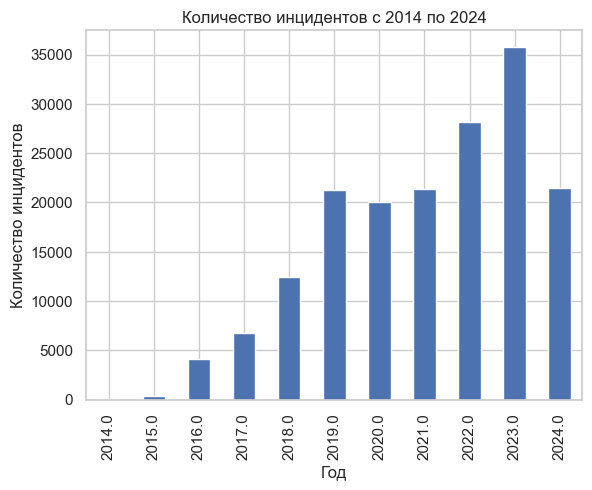

In [64]:
# анализ количества инцидентов по годам
data['dateofincident'] = pd.to_datetime(data['dateofincident'])

# Группировка данных по годам
incidents_per_year = data['dateofincident'].dt.year.value_counts().sort_index()

# Фильтрация данных для промежутка с 2014 по 2024
incidents_per_year_filtered = incidents_per_year.loc[2014:2024]

# Построение графика
incidents_per_year_filtered.plot(kind='bar', title='Количество инцидентов с 2014 по 2024')
plt.xlabel('Год')
plt.ylabel('Количество инцидентов')
plt.show()

Наибольшее количество инцидентов с автомобилями произошло на 2022 и 2023 годы.

## 7. Выводы к исследовательскому анализу данных

1. **Индексация и логическая индексация**: Мы выбрали различные подгруппы данных, что может помочь в дальнейшем анализе специфических проблем, касающихся безопасности и качества производителей.
2. **Сортировка данных**: Анализ травм помог выявить наиболее проблемные автомобили и производителей, которые могут потребовать дополнительного контроля качества.
3. **Фильтрация**: Используя методы `query` и `where`, мы извлекли подмножества данных для более детального анализа, что полезно для идентификации определенных проблем в автомобильных инцидентах.
4. **Сводные таблицы**: Эти таблицы предоставили важные сведения о том, как распределяются травмы и смерти по производителям и годам, позволяя сосредоточить внимание на наиболее опасных моделях.
5. **Группировка и агрегатные функции**: Эти операции помогли понять влияние различных производителей на количество инцидентов, что может быть полезно для предложения улучшений в области автомобильной безопасности.
6. **Дополнительный анализ**: Графики позволяют визуально анализировать тренды, что важно для долгосрочного планирования и анализа безопасности автомобилей.

# Графический анализ данных

## 1. Диаграммы, библиотека Matplotlib

### **1.1. Гистограмма по маркам автомобилей (make)**

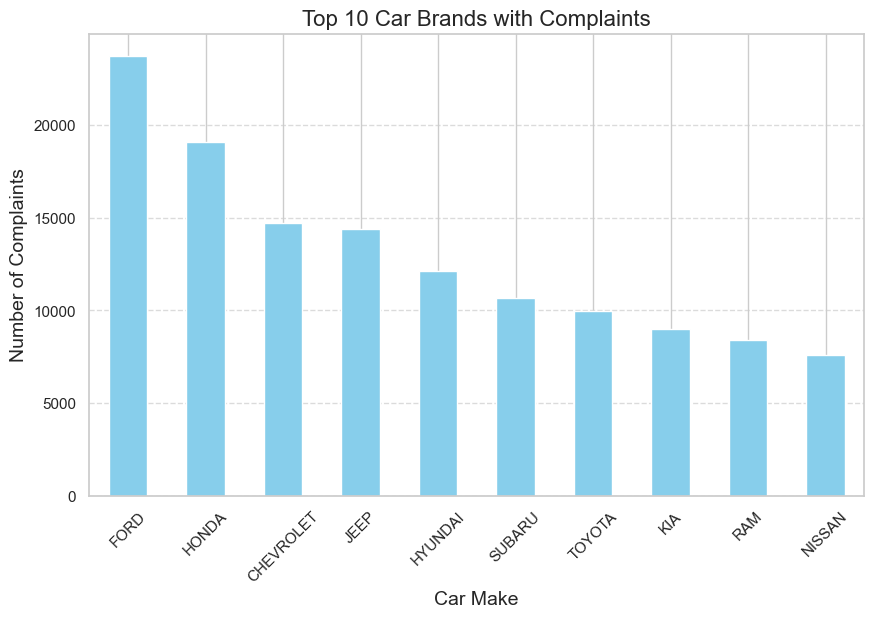

In [55]:
plt.figure(figsize=(10, 6))
data['make'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Car Brands with Complaints', fontsize=16)
plt.xlabel('Car Make', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

### **1.2. Линейный график количества жалоб по годам**

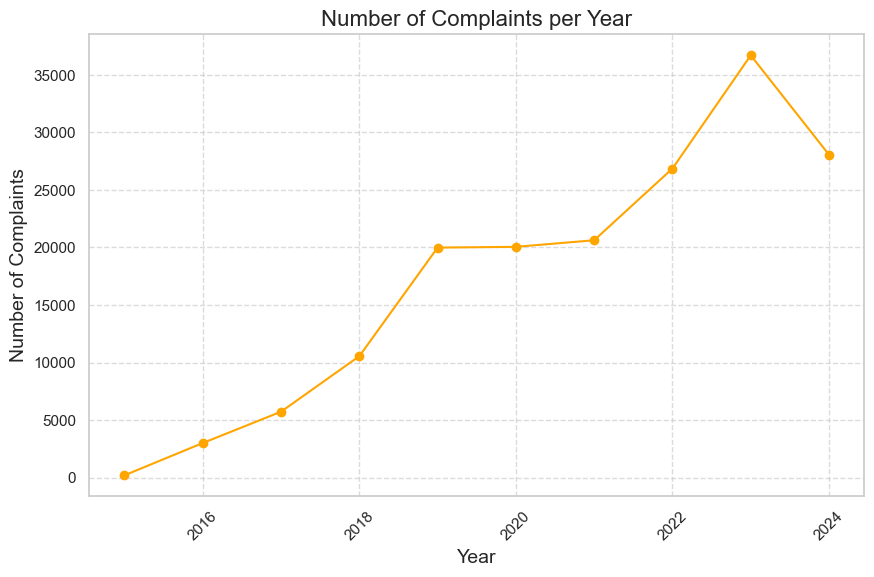

In [56]:
plt.figure(figsize=(10, 6))
data['datecomplaintfiled'] = pd.to_datetime(data['datecomplaintfiled'])
data['year'] = data['datecomplaintfiled'].dt.year
data['year'].value_counts().sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Number of Complaints per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Complaints', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

## **1.3. Круговая диаграмма по основным типам проблем (components)**

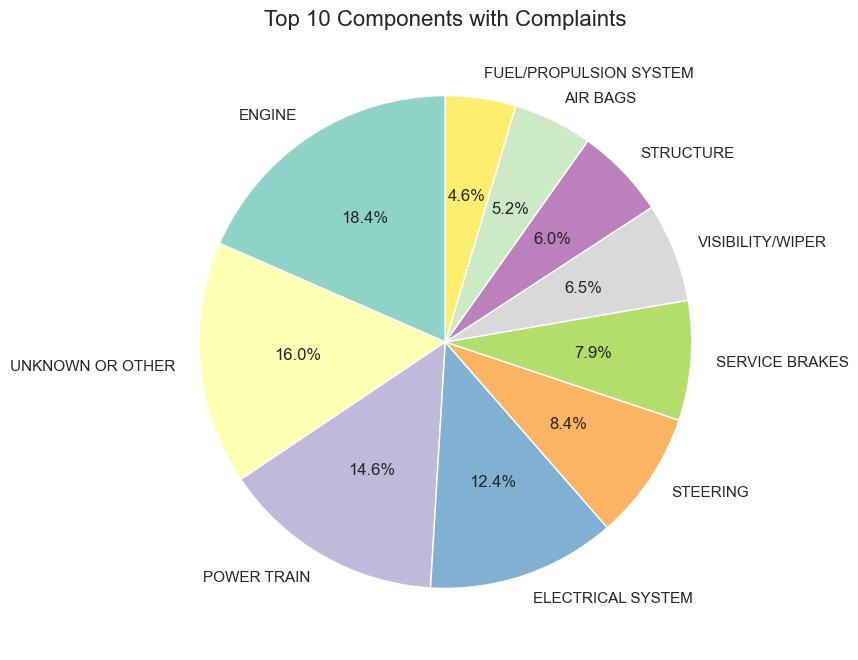

In [57]:
plt.figure(figsize=(8, 8))
data['components'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Top 10 Components with Complaints', fontsize=16)
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2. Диаграммы, библиотека Seaborn

### **2.1. Boxplot: Жалобы по маркам автомобилей (make)**

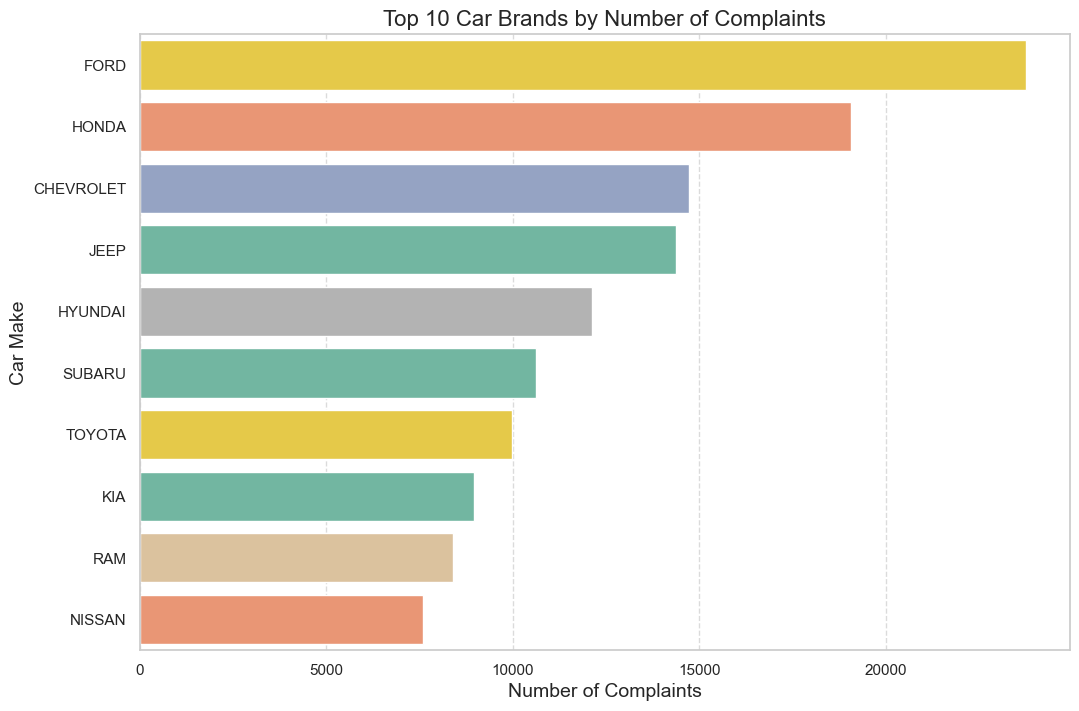

In [58]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='make', order=data['make'].value_counts().index[:10], palette='Set2', hue='make', legend=False)
plt.title('Top 10 Car Brands by Number of Complaints', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Car Make', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### **2.2. Гистограмма распределения по типам проблем (components)**

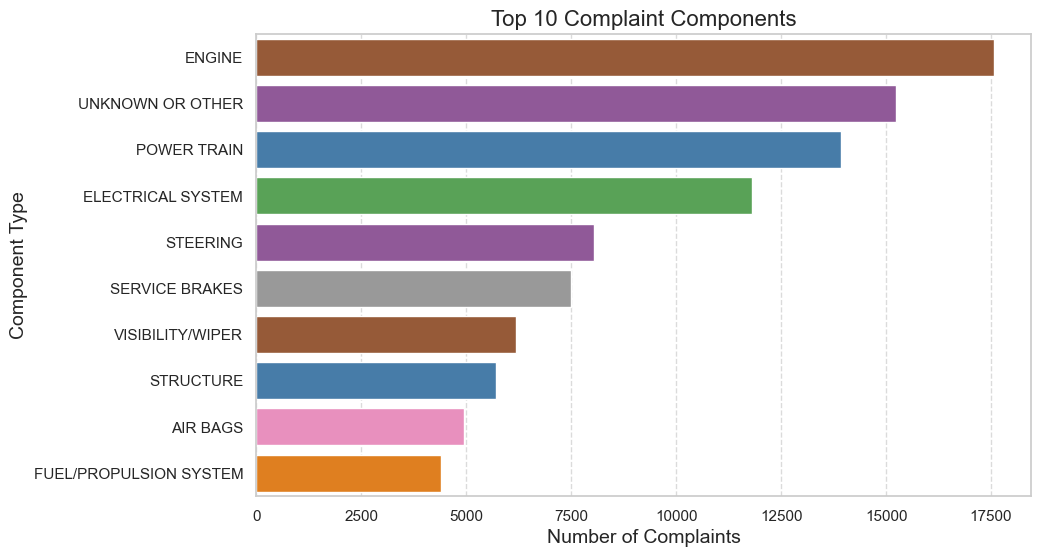

In [59]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='components', order=data['components'].value_counts().index[:10], palette='Set1', hue='components', legend=False)
plt.title('Top 10 Complaint Components', fontsize=16)
plt.xlabel('Number of Complaints', fontsize=14)
plt.ylabel('Component Type', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## 3. "Портрет" типичного потребителя

На основе визуального анализа данных можно составить следующий портрет типичного потребителя:

1. **Марка автомобиля**: Наиболее часто сталкиваются с жалобами на определенные марки, такие как Ford, Toyota и другие.
2. **Типы проблем**: Основные жалобы касаются таких компонентов, как тормоза, двигатель и трансмиссия. Проблемы с безопасностью (например, вспышки огня или дорожно-транспортные происшествия) также поднимаются.
3. **Временной интервал**: Наблюдается тренд на увеличение количества жалоб в определенные годы, что может быть связано с новыми моделями или изменениями в конфигурации автомобилей.
4. **Серьезность инцидента**: Присутствует информация о числе пострадавших и погибших, что указывает на важность этих жалоб.

# Общий вывод по проекту

Эти данные могут помочь производителям автомобилей улучшить свои продукты и услуги, одновременно обеспечивая безопасность своих клиентов. Далее можно углублять анализ, добавляя больше факторов, таких как возраст автомобиля, регион или тип инцидента.